In [57]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline


In [58]:
T = .301 * 9.8
f = 60

def length_model(n, mu):
    return n / (2 * f * np.sqrt(mu / T))

def calc_norm_res(predicted, observed, errors):
    res = observed-predicted
    return res / errors 


In [59]:
n = np.array([1,2,3,4,5,6,7])
length = np.array([.246, .486, .737, .970, 1.197, 1.445, 1.674])
length_err = np.array([.012, .008, .015, .01, .008, .008, .005])


In [60]:
parameters, covariance = opt.curve_fit(length_model, n, length, p0=[.004], sigma=length_err, absolute_sigma=True)

mu = parameters[0]
mu_err = np.sqrt(np.diag(covariance))[0]

fitted_length = length_model(n, mu)
norm_res = calc_norm_res(fitted_length, length, length_err)
chi2 = np.sum(norm_res ** 2)
red_chi2 = chi2 / (7 - 1)


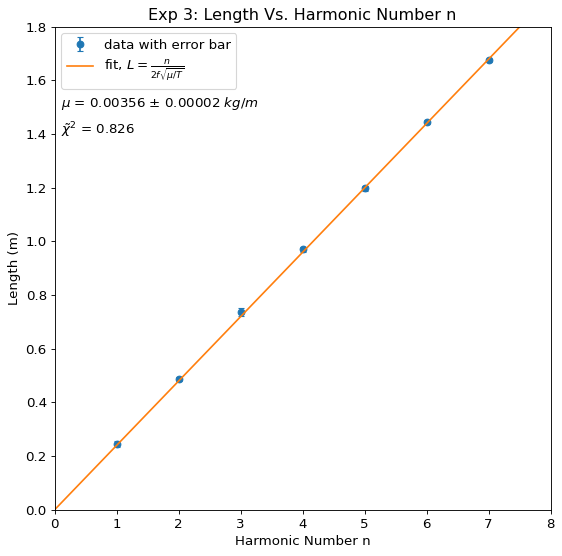

In [61]:
# Plotting data time!

fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(n, length, yerr=length_err, fmt='o', capsize = 3, capthick = 1, label="data with error bar")
plt.errorbar(np.linspace(0,10), length_model(np.linspace(0,10), mu), label=r'fit, $L=\frac{n}{2f\sqrt{\mu/T}}$')

plt.title("Exp 3: Length Vs. Harmonic Number n")
plt.xlabel("Harmonic Number n")
plt.ylabel("Length (m)")

plt.text(0.1,1.5, r'$\mu$ = %5.5f ± %5.5f $kg/m$' % (mu, mu_err))
plt.text(0.1,1.4, r'$\tilde{\chi}^2$ = %5.3f' % red_chi2)
plt.xlim(0, 8)
plt.ylim(0, 1.8)
plt.legend()
plt.show()


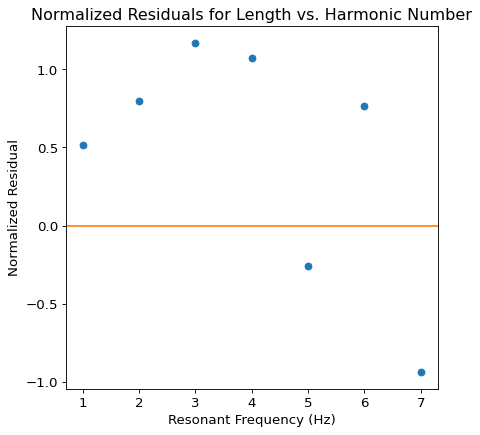

In [62]:
# Plotting residuals time!

fig2=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(n, norm_res, fmt='o')
plt.axhline(color='tab:orange')

plt.title("Normalized Residuals for Length vs. Harmonic Number")
plt.xlabel("Resonant Frequency (Hz)")
plt.ylabel("Normalized Residual")
plt.show()
